# Google Maps Amsterdam restaurants analysis
In this project, I scraped details of Amsterdam restaurants from Google Maps using Selenium and analyzed the data.

# Project Overview :
- ### 0 - Scraping data from Google maps
- ### 1 - Loading the data
- ### 2 - Understanding the data
    - Shape of the data
    - Check column dtypes
    - Check is there any null values
    - Check data types
- ### 3 - Cleaning the data
    - Convert ratings to number
    - Remove K and convert number of reveiws to int
    - Remove "Service options:" from services
- ### 4 - Analyzing Data
    - The Number of scrapped restaurants
    - Min - Meam - Max of Restaurats Rating
    - Rating vs Reviews
    - Rating Distribution
    - Removing outliers and perform analysis
    - Min - Meam - Max of Restaurats Number of Reviews
    - How many restaurants have takeaway?
    - How many restaurants have dine-in?
    - How many restaurants have both dine-in and takeaway?
    - Restaurant with most reviews
    - Restaurant with lowest rating
    - Restaurant with highest rating and No. reviews
    - What categories most restaurants are from?
    - Number of closed Restaurants
    - In what category are the restaurants in terms of price?
    - Restaurant with highest rate in each category
    - Reviews Word Cloud
- ### 5 - Get latitude and longitude based on the addresses
    - Which area of Amsterdam has the most restaurants?
    - Where are most luxury restaurants located ?

In [1]:
# Data preprocessing
import pandas as pd
import numpy as np

# Find lat and long and mapping
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium


# Data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings

# Setup visualization
sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline

## 1 - Loading the data

In [2]:
df_restaurants = pd.read_csv('Amsterdam_restaurants.csv')
df_comments = pd.read_csv('Amsterdam_restaurants_comments.csv')

## 2 - Understanding the data
- Shape of the data
- Check column dtypes
- Check is there any null values
- Check data types

In [3]:
df_restaurants.head()

,title,rating,reviews,expense,category,description,services,address
0,Bhatti Pasal - Authentic Nepalese Food,4.6,(1.6K),$,Nepalese restaurant,No description,Service options: Dine-in · No takeaway · No de...,"Voetboogstraat 23, 1012 XK Amsterdam, Netherlands"
1,Rocca Amsterdam,4.5,(353),Unclear,Restaurant,No description,Service options: Dine-in · Takeaway · No delivery,"Ferdinand Bolstraat 26, 1072 LK Amsterdam, Net..."
2,Sherpa Restaurant,4.6,(1.3K),$$,Indian restaurant,"Relaxed stop with outdoor tables, serving rice...",Service options: Dine-in · Takeaway · Delivery,"Korte Leidsedwarsstraat 58, 1017 RD Amsterdam,..."
3,Restaurant Zaza's,4.8,(560),$$,Restaurant,"Elevated takes on scallops, shrimp & rib eye, ...",Service options: Dine-in · No takeaway · No de...,"Daniël Stalpertstraat 103, 1072 XD Amsterdam, ..."
4,Celia at Kimpton De Witt,4.3,(177),Unclear,Restaurant,No description,Service options: Dine-in · Takeaway · No-conta...,"Nieuwendijk 60, 1012 MB Amsterdam, Netherlands"


### Shape of the data

In [4]:
print("shape of df_restaurants :",df_restaurants.shape)
cprint('*'*42,'red')  
print("shape of df_comments :",df_comments.shape)

shape of df_restaurants : (248, 8)
******************************************
shape of df_comments : (19700, 3)


### Check column dtypes

In [5]:
df_restaurants.isnull().sum()

title           0
rating          0
reviews         0
expense         0
category       27
description     0
services        0
address         0
dtype: int64

### Check data types

In [6]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        248 non-null    object
 1   rating       248 non-null    object
 2   reviews      248 non-null    object
 3   expense      248 non-null    object
 4   category     221 non-null    object
 5   description  248 non-null    object
 6   services     248 non-null    object
 7   address      248 non-null    object
dtypes: object(8)
memory usage: 15.6+ KB


In [7]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19700 entries, 0 to 19699
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    19700 non-null  object
 1   comment  19591 non-null  object
 2   stars    19700 non-null  object
dtypes: object(3)
memory usage: 461.8+ KB


## 3 - Cleaning the data
- Convert ratings to number
- Remove K and convert number of reveiws to int
- Remove "Service options:" from services

### Convert ratings to number

In [8]:
df_restaurants["rating"]  =  df_restaurants["rating"].apply(lambda x:x.replace(",", "."))
df_restaurants["rating"]  =  df_restaurants["rating"].apply(lambda x : float(x))

In [9]:
df_restaurants["reviews"] =  df_restaurants["reviews"].apply(lambda x:x.replace("(", "").replace(")", ""))

### Remove K and convert number of reveiws to int

In [10]:
def convert_to_number(X):
    """
    This function will remove K from reviews and multiple it 
    to 1000. Example (2.8k = 2800)
    """
    if "K" in X:
        converted = X.replace("K", "")
        converted =  float(converted)*1000
    else :
        converted = float(X)
    return converted

In [11]:
df_restaurants["reviews"]  =  df_restaurants["reviews"].apply(lambda x : convert_to_number(x))
df_restaurants["reviews"]  =  df_restaurants["reviews"].apply(lambda x : int(x))

### Remove "Service options:" from services

In [12]:
df_restaurants["services"] =  df_restaurants["services"].apply(lambda x:x.replace("Service options:", ""))

## 4 - Analyzing Data
- The Number of scrapped restaurants
- Min - Meam - Max of Restaurats Rating
- Rating vs Reviews
- Rating Distribution
- Removing outliers and perform analysis
- Min - Meam - Max of Restaurats Number of Reviews
- How many restaurants have takeaway?
- How many restaurants have dine-in?
- How many restaurants have both dine-in and takeaway?
- Restaurant with most reviews
- Restaurant with lowest rating
- Restaurant with highest rating and No. reviews
- What categories most restaurants are from?
- Number of closed Restaurants
- In what category are the restaurants in terms of price?
- Restaurant with highest rate in each category
- Reviews Word Cloud

### The Number of scrapped restaurants

In [14]:
len(df_restaurants)

248

In [15]:
df_open_restaurants = df_restaurants[(df_restaurants['rating'] > 0)&(df_restaurants['title'] != "No title")]

### Min - Meam - Max of Restaurats Rating

Min - Meam - Max of restaurats rating: 
Max Rarings:  5.0
Mean Rarings:  4
Min Rarings:  1.7
**************************************************


<AxesSubplot:xlabel='rating'>

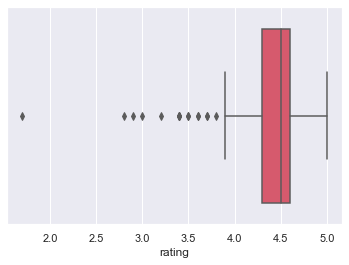

In [80]:
cprint('Min - Meam - Max of restaurats rating: ','red')
print('Max Rarings: ',df_open_restaurants['rating'].max())
print('Mean Rarings: ',round(df_open_restaurants['rating'].mean()))
print('Min Rarings: ',df_open_restaurants['rating'].min())
cprint('*'*50,'red')
sns.boxplot(x=df_open_restaurants["rating"],palette=["#EB455F"])

### Rating vs Reviews

<AxesSubplot:xlabel='rating', ylabel='reviews'>

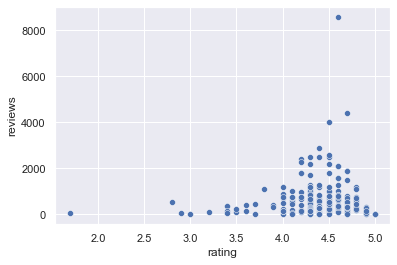

In [17]:
sns.scatterplot(x="rating",y="reviews",data=df_open_restaurants)

### Rating Distribution

<AxesSubplot:xlabel='rating', ylabel='Density'>

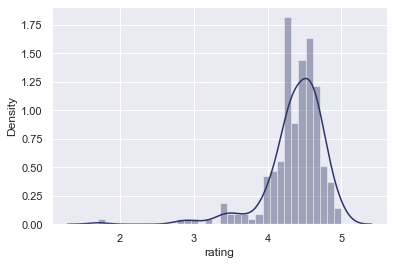

In [18]:
sns.distplot(df_open_restaurants['rating'],color="#2B3467")

### Removing Rating Outliers

In [19]:
Q1 = df_open_restaurants['rating'].quantile(0.25)
Q3 = df_open_restaurants['rating'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_open_restaurants[(df_open_restaurants['rating'] >= lower_bound) & (df_open_restaurants['rating'] <= upper_bound)]

Min - Meam - Max of Restaurants Rating : 
Max Rarings :  5.0
Mean Rarings :  4
Min Rarings :  1.7
**************************************************


<AxesSubplot:xlabel='rating'>

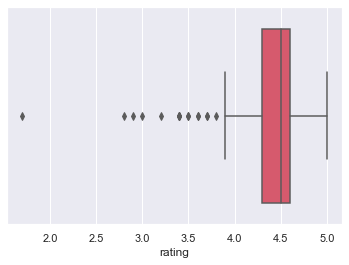

In [87]:
cprint('Min - Meam - Max of Restaurants Rating : ','red')
print('Max Rarings : ',df_filtered['rating'].max())
print('Mean Rarings : ',round(df_filtered['rating'].mean()))
print('Min Rarings : ',df_filtered['rating'].min())
cprint('*'*50,'red')
sns.boxplot(x=df_filtered["rating"],palette=["#EB455F"])

<AxesSubplot:xlabel='rating', ylabel='Density'>

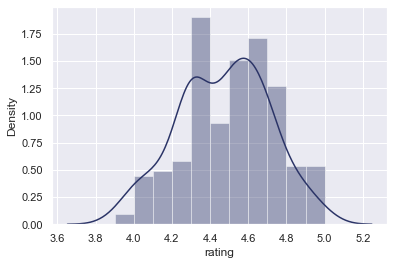

In [21]:
sns.distplot(df_filtered['rating'],color="#2B3467")

### Min - Meam - Max of Restaurats Number of Reviews 

Min - Meam - Max of Reviews : 
Max Reviews :  8600
Mean Reviews :  665
Min Reviews :  1
**************************************************


<AxesSubplot:xlabel='reviews'>

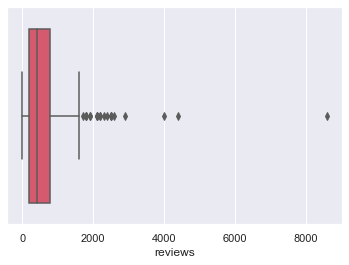

In [22]:
cprint('Min - Meam - Max of Reviews : ','red')
print('Max Reviews : ',df_open_restaurants['reviews'].max())
print('Mean Reviews : ',round(df_open_restaurants['reviews'].mean()))
print('Min Reviews : ',df_open_restaurants['reviews'].min())
cprint('*'*50,'red')
sns.boxplot(x=df_open_restaurants["reviews"],palette=["#EB455F"])

## Reviews Distribution

<AxesSubplot:xlabel='reviews', ylabel='Density'>

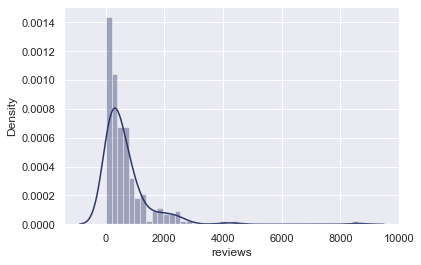

In [23]:
sns.distplot(df_open_restaurants['reviews'],color="#2B3467")

### Remove Reviews Outliers

In [24]:
Q1 = df_open_restaurants['reviews'].quantile(0.25)
Q3 = df_open_restaurants['reviews'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df_open_restaurants[(df_open_restaurants['reviews'] >= lower_bound) & (df_open_restaurants['reviews'] <= upper_bound)]

Mean Reviews :  453


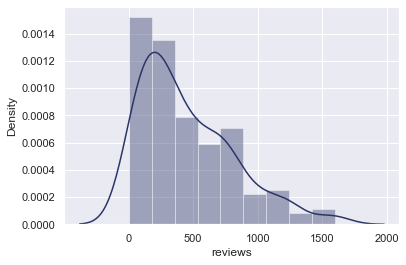

In [25]:
sns.distplot(df_filtered['reviews'],color="#2B3467")
print('Mean Reviews : ',round(df_filtered['reviews'].mean()))

In [26]:
df_open_restaurants['services'] = df_open_restaurants['services'].apply(lambda x:x.lower())

### How many restaurants have takeaway?

In [27]:
len(df_open_restaurants[df_open_restaurants['services'].str.contains('· takeaway ·')])

89

### How many restaurants have  dine-in?

In [28]:

len(df_open_restaurants[df_open_restaurants['services'].str.contains('dine-in ·')])

213

### How many restaurants have both dine-in and takeaway?

In [29]:
len(df_open_restaurants[df_open_restaurants['services'].str.contains('dine-in · takeaway ·')])

89

### Restaurant with most reviews

In [30]:
df_restaurants.nlargest(1, 'reviews')

,title,rating,reviews,expense,category,description,services,address
223,Winkel 43,4.6,8600,$$,Cafe,"Known for its apple pie, this lively cafe/bar ...",Dine-in · Takeaway · No delivery,"Noordermarkt 43, 1015 NA Amsterdam, Netherlands"


### Restaurant with lowest rating

In [31]:
df_restaurants_open = df_restaurants[(df_restaurants['title'] != "No title")&(df_restaurants['reviews'] != 0)]

df_restaurants_open.nsmallest(1, 'rating')

,title,rating,reviews,expense,category,description,services,address
222,BURGERS MIX GRILL / Trash Food,1.7,54,Unclear,Hamburger restaurant,No description,Dine-in · Takeaway,"Oude Hoogstraat 20HS, 1012 CE Amsterdam, Nethe..."


### Restaurant with highest rating and No. reviews

In [32]:
df_restaurants.nlargest(1, ['reviews', 'rating'])

,title,rating,reviews,expense,category,description,services,address
223,Winkel 43,4.6,8600,$$,Cafe,"Known for its apple pie, this lively cafe/bar ...",Dine-in · Takeaway · No delivery,"Noordermarkt 43, 1015 NA Amsterdam, Netherlands"


### Restaurant with highest rating

In [33]:
df_restaurants.nlargest(1, 'rating')

,title,rating,reviews,expense,category,description,services,address
131,Restaurant Dinner Cruise Amsterdam - Rondvaart...,5.0,2,Unclear,Restaurant,No description,Dine-in · No delivery,"Prinsengracht 648, 1017 KV Amsterdam, Netherlands"


In [85]:
def countplot(feature_name,df,XAxis=True):
    """
    This function will create a custom countplot based on your desire feature
    """
    plt.figure(figsize = (12, 9))
    if XAxis == True:
        ax = sns.countplot(x=df[feature_name],
                           order=df[feature_name].value_counts(ascending=False).index);
    else :
        ax = sns.countplot(y=df[feature_name],
                           order=df[feature_name].value_counts(ascending=False).index);
        
    abs_values = df[feature_name].value_counts(ascending=False).values

    ax.bar_label(container=ax.containers[0], labels=abs_values,fontsize=12)

### What categories most restaurants are from?

Restaurant                                  93
Italian restaurant                          19
Indian restaurant                           10
Hamburger restaurant                         5
Fine dining restaurant                       5
Dutch restaurant                             5
Cocktail bar                                 5
French restaurant                            4
Fast food restaurant                         4
Japanese restaurant                          4
Brunch restaurant                            3
Indonesian restaurant                        3
Cafe                                         3
Seafood restaurant                           3
Turkish restaurant                           3
Sushi restaurant                             3
Pizza restaurant                             3
Breakfast restaurant                         3
Steak house                                  3
Bistro                                       2
Vietnamese restaurant                        2
Vegan restaur

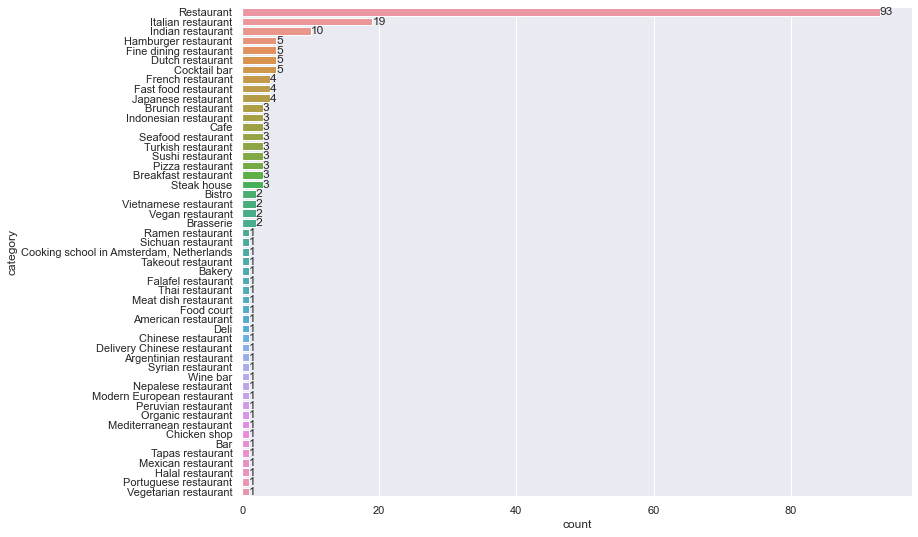

In [86]:
print(df_restaurants['category'].value_counts())
cprint('*'*50,'red')
countplot('category',df_restaurants,XAxis=False)

## 5 - Get latitude and longitude based on the addresses
- Which area of Amsterdam has the most restaurants?
- Where are most luxury restaurants located ?

In [36]:
geolocator = Nominatim(user_agent="my_request")

result = []
for addr in df_restaurants['address']:
    location = geolocator.geocode(addr)
    try:
        location_dict = {'address':addr,'latitude':location.latitude,'longitude':location.longitude}
    except:
        location_dict = {'address':addr,'latitude':None,'longitude':None}
        
    result.append(location_dict)
df_locations = pd.DataFrame(result)

In [37]:
df_locations.isnull().sum()

address      0
latitude     7
longitude    7
dtype: int64

In [38]:
df_restaurants = df_restaurants.merge(df_locations,on='address')

In [39]:
df_restaurants = df_restaurants.drop_duplicates(keep='last')

In [40]:
df_heat_map = df_restaurants[['latitude','longitude']]
df_heat_map = df_heat_map.dropna()

### Which area of Amsterdam has the most restaurants?

In [42]:
m = folium.Map(location=[df_heat_map['latitude'].mean(),df_heat_map['longitude'].mean()],zoom_start=12)

heat_data = df_heat_map[['latitude','longitude']].values.tolist()
m.add_child(HeatMap(heat_data,radius=15))

## Where are most luxury restaurants located?

In [58]:
expensive_restaurants = df_restaurants[df_restaurants['expense'].str.contains('^(\$){3,4}$')]

In [61]:
expensive_restaurants=expensive_restaurants.dropna()

In [63]:
m = folium.Map(location=[expensive_restaurants['latitude'].mean(),expensive_restaurants['longitude'].mean()],zoom_start=12)

heat_data = expensive_restaurants[['latitude','longitude']].values.tolist()
m.add_child(HeatMap(heat_data,radius=15))

### Number of closed Restaurants

In [257]:
len(df_restaurants[df_restaurants['title'] == "No title"])

15

### In what category are the restaurants in terms of price?

Unclear    143
$$          79
$$$         15
$            7
$$$$         4
Name: expense, dtype: int64
**************************************************


<AxesSubplot:xlabel='expense', ylabel='count'>

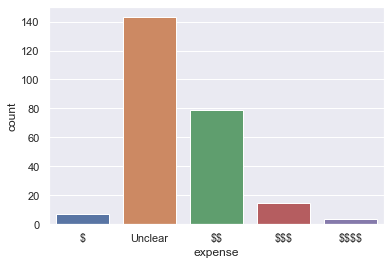

In [246]:
print(df_restaurants['expense'].value_counts())
cprint('*'*50,'red')
sns.countplot(df_restaurants['expense'].str.replace('\$\$','\\$\\$'))

### Restaurant with highest rate in each category

In [248]:
# Group the data by category
grouped_data = df_restaurants.groupby('category')

# Get the most expensive item in each category
most_expensive = grouped_data.apply(lambda x: x.sort_values('rating', ascending=False).iloc[0])

In [250]:
most_expensive.sort_values('rating',ascending=False)

,title,rating,reviews,expense,category,description,services,address
category,,,,,,,,
Fine dining restaurant,Alan Dining,5.0,9,Unclear,Fine dining restaurant,No description,Dine-in · No delivery,"Daniël Stalpertstraat 92IV, 1072 XL Amsterdam,..."
Restaurant,Dam Steakhaus,5.0,2,Unclear,Restaurant,No description,Dine-in · Takeaway · No delivery,"Warmoesstraat 170, 1012 JK Amsterdam, Netherlands"
"Cooking school in Amsterdam, Netherlands",Esther's Cookery,4.9,145,Unclear,"Cooking school in Amsterdam, Netherlands",No description,Unclear,"Gerard Doustraat 46HS, 1072 VT Amsterdam, Neth..."
Bakery,Margo's Amsterdam,4.9,261,Unclear,Bakery,No description,Dine-in · Takeaway · Delivery,"Eerste Tuindwarsstraat 2A, 1015 RV Amsterdam, ..."
Modern European restaurant,Hidden Amsterdam,4.9,21,Unclear,Modern European restaurant,No description,Dine-in · No takeaway · No delivery,"Olympisch Stadion 35, 1076 DE Amsterdam, Nethe..."
French restaurant,o bistro,4.9,159,Unclear,French restaurant,No description,Dine-in · No takeaway · No delivery,"Lindengracht 248, 1015 KM Amsterdam, Netherlands"
Sushi restaurant,Ken Sushi,4.9,329,Unclear,Sushi restaurant,No description,Dine-in · No delivery,"Geldersekade 19, 1011 EJ Amsterdam, Netherlands"
Cocktail bar,Rosalia's Menagerie,4.8,714,Unclear,Cocktail bar,No description,Dine-in · No takeaway · No delivery,"Kloveniersburgwal 20, 1012 CV Amsterdam, Nethe..."
Fast food restaurant,Fabel Friet,4.8,1100,Unclear,Fast food restaurant,Relaxed outpost producing fried potatoes & cro...,Dine-in · Takeaway · No-contact delivery,"Runstraat 1, 1016 GJ Amsterdam, Netherlands"


### Reviews Word Cloud

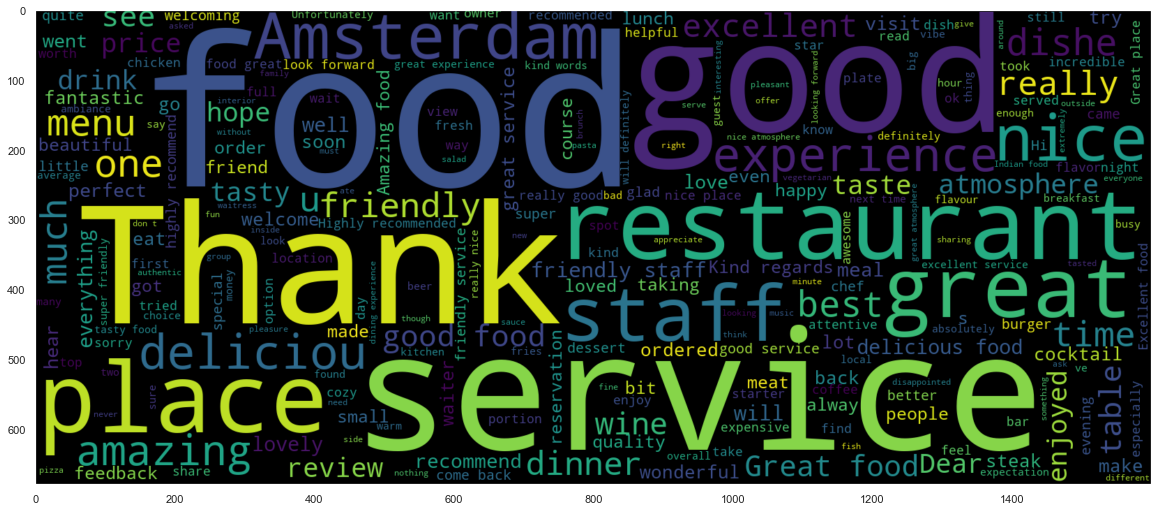

In [251]:
plt.figure(figsize = (20,20)) 
worldcould_bad = WordCloud(min_font_size = 3,  max_words = 250 , width = 1600 , height = 680).generate(" ".join(df_comments.dropna()['comment']))
plt.imshow(worldcould_bad,interpolation = 'bilinear')
plt.grid(None)